In [13]:
'''
In your Jupyter notebook, you should use three cells: the 1st cell is for importing all
the necessary Python modules for this analysis. 

'''
from matplotlib import pyplot as plt
import numpy as np
import cx_Oracle
from sklearn.cluster import KMeans

In [14]:
'''
the 2nd cell is to connect Python to
your Oracle database and create a numpy array containing the three columns of
data that are read from the beeGenes table in your Oracle database
'''
con = cx_Oracle.connect('arushi/[redacted]')
cur = con.cursor()
obj = cur.execute('''select freq_A, freq_T, freq_GC from beeGenes''')

freqs = []
for x in obj:
    temp = []
    
    temp.append(x[0])
    temp.append(x[1])
    temp.append(x[2])
    
    freqs.append(temp)

freqs = np.array(freqs)
lengthList = len(freqs)
freqs

array([[0.28873369, 0.20823378, 0.50284874],
       [0.31538462, 0.2993007 , 0.38461538],
       [0.38306011, 0.27377049, 0.3431694 ],
       ...,
       [0.24716929, 0.19414526, 0.55868545],
       [0.31555556, 0.24444444, 0.44      ],
       [0.27875597, 0.23992101, 0.48132302]])

Text(0.5, 0.92, 'KMeans')

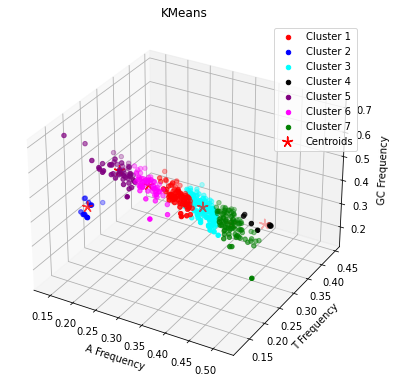

In [15]:
'''
the 3rd cell
is for carrying out the K-Means analysis and plotting a 3D scatter plot using the three
columns of data based on the clusters identified by the K-Means analysis.
'''

X = np.empty((lengthList, 3))
X[:,0] = freqs[:,0]
X[:,1] = freqs[:,1]
X[:,2] = freqs[:,2]

km = KMeans(n_clusters=7, init='random', n_init=10, max_iter=500,tol=1e-4, random_state=0)


fig = plt.figure(figsize=(14, 14))
ax1 = fig.add_subplot(121, projection="3d")

y_km = km.fit_predict(X)
ax1.scatter(X[y_km==0, 0], X[y_km == 0, 1], X[y_km == 0, 2], s = 20, c='red', marker = 'o', label = 'Cluster 1')
ax1.scatter(X[y_km==1, 0], X[y_km == 1, 1], X[y_km == 1, 2], s = 20, c='blue', marker = 'o', label = 'Cluster 2')
ax1.scatter(X[y_km==2, 0], X[y_km == 2, 1], X[y_km == 2, 2], s = 20, c='aqua', marker = 'o', label = 'Cluster 3')
ax1.scatter(X[y_km==3, 0], X[y_km == 3, 1], X[y_km == 3, 2], s = 20, c='black', marker = 'o', label = 'Cluster 4')
ax1.scatter(X[y_km==4, 0], X[y_km == 4, 1], X[y_km == 4, 2], s = 20, c='purple', marker = 'o', label = 'Cluster 5')
ax1.scatter(X[y_km==5, 0], X[y_km == 5, 1], X[y_km == 5, 2], s = 20, c='magenta', marker = 'o', label = 'Cluster 6')
ax1.scatter(X[y_km==6, 0], X[y_km == 6, 1], X[y_km == 6, 2], s = 20, c='green', marker = 'o', label = 'Cluster 7')

ax1.set_xlabel("A Frequency")
ax1.set_ylabel("T Frequency")
ax1.set_zlabel("GC Frequency")

centroids = km.cluster_centers_
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]
centroids_z = centroids[:,2]

ax1.scatter(centroids_x,centroids_y,centroids_z, marker = (5,2), zorder = 5, s=100, c=['red']*7, label = "Centroids")

ax1.legend(loc=1)
ax1.grid()
ax1.set_title("KMeans")